In [4]:
import xarray as xr
ds = xr.open_dataset('data/grib/adaptor.mars.internal-1678824813.2640746-6308-19-d6a4b9a0-b5a5-4d6f-81d5-3d7bcd40d3ed.grib', engine='cfgrib')
ds

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\WindDataPreporation2\lib\site-packages\cfgrib\dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\admin\anaconda3\envs\WindDataPreporation2\lib\site-packages\cfgrib\dataset.py", line 609, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1609459200, 1609462800, 1609466400, ..., 1640984400, 1640988000,
       1640991600])) new_value=Variable(dimensions=('time',), data=array([1609437600, 1609480800, 1609524000, 1609567200, 1609610400,
       1609653600, 1609696800, 1609740000, 1609783200, 1609826400,
       1609869600, 1609912800, 1609956000, 1609999200, 1610042400,
       1610085600, 1610128800, 1610172000, 1610215200, 1610258400,
       1610301600, 16103448

<xarray.Dataset>
Dimensions:     (latitude: 8, longitude: 13, time: 8760)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 55.0 54.75 54.5 54.25 54.0 53.75 53.5 53.25
  * longitude   (longitude) float64 46.54 46.79 47.04 ... 49.04 49.29 49.54
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
    tcc         (time, latitude, longitude) float32 ...
    tcrw        (time, latitude, longitude) float32 ...
    tcw         (time, latitude, longitude) float32 ...
    tcwv        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-03-15T11:58 GRIB to CDM+CF via cfgrib-0.9.1...

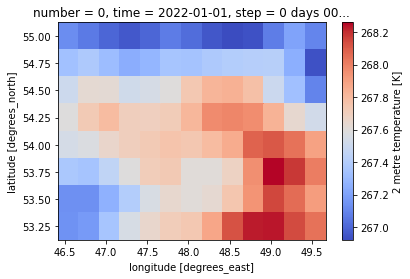

In [31]:
import matplotlib.pyplot as plt
ds.t2m[0].plot(cmap=plt.cm.coolwarm)

In [32]:
la = 54.25
lo = 48.29

In [33]:
data = ds.sel(latitude=la)
data = data.sel(longitude=lo)
data

<xarray.Dataset>
Dimensions:     (time: 8760)
Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    float64 54.25
    longitude   float64 48.29
    valid_time  (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Data variables:
    u10         (time) float32 ...
    v10n        (time) float32 ...
    v10         (time) float32 ...
    t2m         (time) float32 ...
    hcc         (time) float32 ...
    lcc         (time) float32 ...
    mcc         (time) float32 ...
    sp          (time) float32 ...
    tcc         (time) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-03-14T09:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [61]:
import pandas as pd

df = data.to_dataframe()
df

,number,step,surface,latitude,longitude,valid_time,u10,v10n,v10,t2m,hcc,lcc,mcc,sp,tcc
time,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 00:00:00,1.960325,3.144134,3.219534,267.969940,0.000000,0.965546,0.963456,99458.8125,1.000000
2022-01-01 01:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 01:00:00,1.600544,3.140244,3.246711,267.969116,0.000000,0.850036,0.957973,99375.1250,0.993360
2022-01-01 02:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 02:00:00,1.531470,3.453069,3.532868,268.170654,0.000000,0.846262,0.867700,99302.4375,0.955804
2022-01-01 03:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 03:00:00,1.480513,3.630889,3.744795,268.220917,0.000008,0.909617,0.906993,99262.0625,0.978998
2022-01-01 04:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 04:00:00,1.267568,4.089325,4.163239,268.255157,0.023926,0.896090,0.990739,99190.1250,0.990745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 19:00:00,-0.984134,0.676737,0.855892,271.606384,0.617343,0.972578,0.982065,99935.0000,1.000000
2022-12-31 20:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 20:00:00,-1.033106,0.353951,0.566562,271.510925,0.282837,0.901779,0.960236,99947.6875,0.974585
2022-12-31 21:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 21:00:00,-0.638301,0.151268,0.221360,271.347717,0.052719,0.837852,0.801407,99953.9375,0.919725


<AxesSubplot:xlabel='time'>

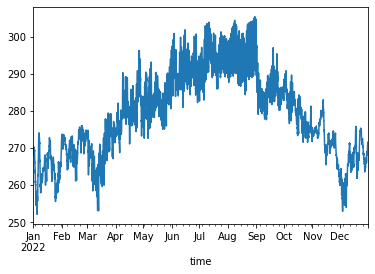

In [62]:
df.t2m.plot()

In [63]:
def kel_to_grad(a):
    return (a - 273.15)
print(kel_to_grad(19))

df.t2m = df.t2m.apply(kel_to_grad)

-254.14999999999998


In [64]:
df

,number,step,surface,latitude,longitude,valid_time,u10,v10n,v10,t2m,hcc,lcc,mcc,sp,tcc
time,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 00:00:00,1.960325,3.144134,3.219534,-5.180060,0.000000,0.965546,0.963456,99458.8125,1.000000
2022-01-01 01:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 01:00:00,1.600544,3.140244,3.246711,-5.180884,0.000000,0.850036,0.957973,99375.1250,0.993360
2022-01-01 02:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 02:00:00,1.531470,3.453069,3.532868,-4.979346,0.000000,0.846262,0.867700,99302.4375,0.955804
2022-01-01 03:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 03:00:00,1.480513,3.630889,3.744795,-4.929083,0.000008,0.909617,0.906993,99262.0625,0.978998
2022-01-01 04:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 04:00:00,1.267568,4.089325,4.163239,-4.894843,0.023926,0.896090,0.990739,99190.1250,0.990745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 19:00:00,-0.984134,0.676737,0.855892,-1.543616,0.617343,0.972578,0.982065,99935.0000,1.000000
2022-12-31 20:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 20:00:00,-1.033106,0.353951,0.566562,-1.639075,0.282837,0.901779,0.960236,99947.6875,0.974585
2022-12-31 21:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 21:00:00,-0.638301,0.151268,0.221360,-1.802283,0.052719,0.837852,0.801407,99953.9375,0.919725


<AxesSubplot:xlabel='time'>

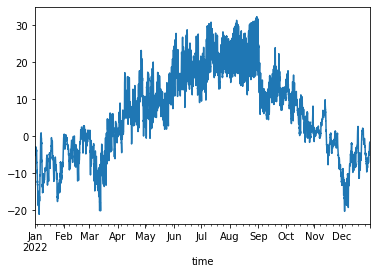

In [65]:
df.t2m.plot()

In [75]:
import numpy as np
df['ws'] = np.sqrt(np.square(df.u10)+np.square(df.v10))
df['wd'] = np.arctan2(df.v10,df.u10)

In [76]:
df = df.sort_index()
df

,number,step,surface,latitude,longitude,valid_time,u10,v10n,v10,t2m,hcc,lcc,mcc,sp,tcc,ws,wd
time,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 00:00:00,1.960325,3.144134,3.219534,-5.180060,0.000000,0.965546,0.963456,99458.8125,1.000000,3.769387,1.023869
2022-01-01 01:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 01:00:00,1.600544,3.140244,3.246711,-5.180884,0.000000,0.850036,0.957973,99375.1250,0.993360,3.619789,1.112785
2022-01-01 02:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 02:00:00,1.531470,3.453069,3.532868,-4.979346,0.000000,0.846262,0.867700,99302.4375,0.955804,3.850527,1.161755
2022-01-01 03:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 03:00:00,1.480513,3.630889,3.744795,-4.929083,0.000008,0.909617,0.906993,99262.0625,0.978998,4.026836,1.194303
2022-01-01 04:00:00,0,0 days,0.0,54.25,48.29,2022-01-01 04:00:00,1.267568,4.089325,4.163239,-4.894843,0.023926,0.896090,0.990739,99190.1250,0.990745,4.351929,1.275247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 19:00:00,-0.984134,0.676737,0.855892,-1.543616,0.617343,0.972578,0.982065,99935.0000,1.000000,1.304251,2.425777
2022-12-31 20:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 20:00:00,-1.033106,0.353951,0.566562,-1.639075,0.282837,0.901779,0.960236,99947.6875,0.974585,1.178261,2.639974
2022-12-31 21:00:00,0,0 days,0.0,54.25,48.29,2022-12-31 21:00:00,-0.638301,0.151268,0.221360,-1.802283,0.052719,0.837852,0.801407,99953.9375,0.919725,0.675595,2.807775


In [71]:
df.describe()

,number,step,surface,latitude,longitude,u10,v10n,v10,t2m,hcc,lcc,mcc,sp,tcc,ws
count,8760.0,8760,8760.0,8760.00,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,0.469541,0.328967,0.359923,6.193611,0.398209,0.412928,0.396124,100066.468750,0.696087,3.692751
std,0.0,0 days 00:00:00,0.0,0.00,7.105833e-15,2.606911,3.054240,3.114960,11.593855,0.426913,0.418039,0.396915,1027.587769,0.372062,1.791938
min,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,-6.793554,-10.553148,-10.590005,-21.055014,0.000000,0.000000,0.000000,95351.812500,0.000000,0.026861
25%,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,-1.593993,-1.737794,-1.839622,-2.845084,0.000000,0.000000,0.001526,99412.265625,0.377525,2.309498
50%,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,0.426301,0.127628,0.186900,5.950266,0.163952,0.236938,0.255104,100041.093750,0.922487,3.404782
75%,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,2.359019,2.265807,2.379051,15.517328,0.925211,0.907661,0.844800,100685.562500,0.999941,4.829599
max,0.0,0 days 00:00:00,0.0,54.25,4.829000e+01,9.856258,9.611480,9.671718,32.343652,1.000008,1.000008,1.000007,103833.125000,1.000007,11.355823


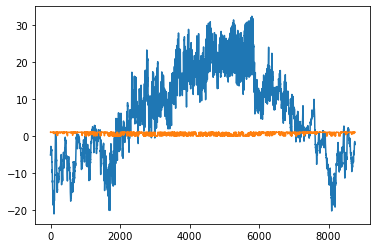

In [85]:
plt.plot(range(8760),df.t2m)
plt.plot(range(8760),df.tcc)

In [41]:
#fig_path = 'fig'
#i = 0
#while i < 10:
#    plt.clf()
#    fig = ds.tcc[i].plot(cmap=plt.cm.coolwarm)
#    plt.savefig(f'{fig_path}/{i}.png')
#    i+=1